# 트위터 API 로 키워드와 연관된 네트워크 분석(연관 분석) 진행하기

## 1. 특정 키워드 크롤링과 메타 데이터에서 정보 출력하기

In [3]:
import tweepy

consumer_key = 'm2RErOMjxW6n7ZKSqdHTjZzX6'
consumer_secret = 'nfvkrnjD601tPLDUpqntTuLFXTzNLr5rH8RoOUJQqKmBH2q6qr'
access_token_key = '1335444832504803328-AHLs4eJHzYkTC7NbsJIKj9F79joRzA'
access_token_secret = 'Q9ZF40YnjCkYCWDiLr6e8yMnuLVz0X2ZvFENSi7bhtvHq'

# 개인정보 인증을 요청하는 handler 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# 인증 요청 수행
auth.set_access_token(access_token_key, access_token_secret)

# twitter api 를 사용하기 위한 준비
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# twitter api 를 사용하여 키워드가 포함된 트윗들을 크롤링한 뒤, entities 에서 'user_mentions', 'hashtags' 를 추출합니다.
keyword = '마라탕'
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags']) # 해시태그
    print(tweet.text) # 트윗 내용

[{'screen_name': 'RYEONG0508', 'name': '령♡', 'id': 1323484781892554752, 'id_str': '1323484781892554752', 'indices': [0, 11]}]
[]
@RYEONG0508 진짜 마라탕 완전 맛있어욬ㅋㅋㅋㅋ!!!!진짜 샹궈도 맛있고 그냥 이건 정말 맛있어요...재료도 좋아하는 거 담을 수 있으니 정말정말 좋고 맛있어요 진짜 꼭꼭 드세여.......
[{'screen_name': 'seebu___', 'name': '작심일일', 'id': 1301566654359326720, 'id_str': '1301566654359326720', 'indices': [3, 12]}]
[]
RT @seebu___: 마라탕 좋아하는 애들 특징 https://t.co/imT2TfL777
[{'screen_name': 'jungin_owo', 'name': '정인', 'id': 964854090323738624, 'id_str': '964854090323738624', 'indices': [0, 11]}]
[]
@jungin_owo 그러게 누가 마라탕먹으래
[{'screen_name': 'RYEONG0508', 'name': '령♡', 'id': 1323484781892554752, 'id_str': '1323484781892554752', 'indices': [0, 11]}]
[]
@RYEONG0508 령밈 진짜 꼭 드셔보세여 ... 저 한번 먹고 하루동안 마라탕으로 버틴 적두 많아여 진짜 존맛탱 ... 아 근데 호불호가 갈린다고 해서여 꼬옥 입맛에 맞으셧으면 조켓서요 !!!
[{'screen_name': 'sunhan_00', 'name': '선한🐢(~1/4)', 'id': 1291952214341083137, 'id_str': '1291952214341083137', 'indices': [0, 10]}]
[]
@sunhan_00 휴 내 열과 성을 다 한 주접이야
선한 당신 나랑 짱친을 먹어야겠어
나

## 2. 연관 분석 기법을 사용해서 키워드 분석하기
### step 1: **pandas** 를 이용해서 트윗이 생성된 날짜와 트윗의 내용을 데이터 프레임의 형태로 만들기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy

consumer_key = 'm2RErOMjxW6n7ZKSqdHTjZzX6'
consumer_secret = 'nfvkrnjD601tPLDUpqntTuLFXTzNLr5rH8RoOUJQqKmBH2q6qr'
access_token_key = '1335444832504803328-AHLs4eJHzYkTC7NbsJIKj9F79joRzA'
access_token_secret = 'Q9ZF40YnjCkYCWDiLr6e8yMnuLVz0X2ZvFENSi7bhtvHq'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

keyword = '마라탕'
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# 트위터 api 를 사용하여 키워드가 포함된 100페이지의 트윗들을 크롤링한 뒤, 'text', 'created_at' 정보를 데이터 프레임으로 저장합니다.
for i in range(1, 100):
    print('Get Data', str(i/500*100), '% complete...')
    tweets = api.search(keyword)
    for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print('Get data 100% complete...')
df.head(10)

Get Data 0.2 % complete...
Get Data 0.4 % complete...
Get Data 0.6 % complete...
Get Data 0.8 % complete...
Get Data 1.0 % complete...
Get Data 1.2 % complete...
Get Data 1.4000000000000001 % complete...
Get Data 1.6 % complete...
Get Data 1.7999999999999998 % complete...
Get Data 2.0 % complete...
Get Data 2.1999999999999997 % complete...
Get Data 2.4 % complete...
Get Data 2.6 % complete...
Get Data 2.8000000000000003 % complete...
Get Data 3.0 % complete...
Get Data 3.2 % complete...
Get Data 3.4000000000000004 % complete...
Get Data 3.5999999999999996 % complete...
Get Data 3.8 % complete...
Get Data 4.0 % complete...
Get Data 4.2 % complete...
Get Data 4.3999999999999995 % complete...
Get Data 4.6 % complete...
Get Data 4.8 % complete...
Get Data 5.0 % complete...
Get Data 5.2 % complete...
Get Data 5.4 % complete...
Get Data 5.6000000000000005 % complete...
Get Data 5.800000000000001 % complete...
Get Data 6.0 % complete...
Get Data 6.2 % complete...
Get Data 6.4 % complete...
Ge

Rate limit reached. Sleeping for: 563


Get Data 19.400000000000002 % complete...
Get Data 19.6 % complete...
Get Data 19.8 % complete...
Get data 100% complete...


,created,tweet_text
0,2020-12-08 18:32:18,@RYEONG0508 진짜 마라탕 완전 맛있어욬ㅋㅋㅋㅋ!!!!진짜 샹궈도 맛있고 그...
1,2020-12-08 18:31:58,RT @seebu___: 마라탕 좋아하는 애들 특징 https://t.co/imT2...
2,2020-12-08 18:31:53,@jungin_owo 그러게 누가 마라탕먹으래
3,2020-12-08 18:31:30,@RYEONG0508 령밈 진짜 꼭 드셔보세여 ... 저 한번 먹고 하루동안 마라탕...
4,2020-12-08 18:31:00,@sunhan_00 휴 내 열과 성을 다 한 주접이야\n선한 당신 나랑 짱친을 먹어...
5,2020-12-08 18:30:49,@kkksh58 마라탕 먹방 영상만 주구장창 돌려보고 있어요… 꼭 먹고싶어요ㅜㅜㅜㅜㅜㅜㅜ
6,2020-12-08 18:30:35,RT @seebu___: 마라탕 좋아하는 애들 특징 https://t.co/imT2...
7,2020-12-08 18:28:38,짜증나 화가 화가 화가 화가 화가 화가 허거 커 허거 허거 허거 허거 허거 허거 허...
8,2020-12-08 18:28:18,마라탕 먹고 싶다\n팽이버섯 후루룹 먹고 싶음
9,2020-12-08 18:27:13,@RYEONG0508 헉 마라탕은 한 번 먹으면 그 뒤로 중독돼요...


### step 2: 키워드 추출하기

In [6]:
import re

# 한글 이외의 문자는 모두 제거하는 함수 생성
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

df['korean_text'] =  df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head(10)

,created,tweet_text,korean_text
0,2020-12-08 18:32:18,@RYEONG0508 진짜 마라탕 완전 맛있어욬ㅋㅋㅋㅋ!!!!진짜 샹궈도 맛있고 그...,진짜 마라탕 완전 맛있어욬ㅋㅋㅋㅋ진짜 샹궈도 맛있고 그냥 이건 정말 맛있어요재료도...
1,2020-12-08 18:31:58,RT @seebu___: 마라탕 좋아하는 애들 특징 https://t.co/imT2...,마라탕 좋아하는 애들 특징
2,2020-12-08 18:31:53,@jungin_owo 그러게 누가 마라탕먹으래,그러게 누가 마라탕먹으래
3,2020-12-08 18:31:30,@RYEONG0508 령밈 진짜 꼭 드셔보세여 ... 저 한번 먹고 하루동안 마라탕...,령밈 진짜 꼭 드셔보세여 저 한번 먹고 하루동안 마라탕으로 버틴 적두 많아여 진...
4,2020-12-08 18:31:00,@sunhan_00 휴 내 열과 성을 다 한 주접이야\n선한 당신 나랑 짱친을 먹어...,휴 내 열과 성을 다 한 주접이야선한 당신 나랑 짱친을 먹어야겠어나랑 마라탕도 먹자
5,2020-12-08 18:30:49,@kkksh58 마라탕 먹방 영상만 주구장창 돌려보고 있어요… 꼭 먹고싶어요ㅜㅜㅜㅜㅜㅜㅜ,마라탕 먹방 영상만 주구장창 돌려보고 있어요 꼭 먹고싶어요ㅜㅜㅜㅜㅜㅜㅜ
6,2020-12-08 18:30:35,RT @seebu___: 마라탕 좋아하는 애들 특징 https://t.co/imT2...,마라탕 좋아하는 애들 특징
7,2020-12-08 18:28:38,짜증나 화가 화가 화가 화가 화가 화가 허거 커 허거 허거 허거 허거 허거 허거 허...,짜증나 화가 화가 화가 화가 화가 화가 허거 커 허거 허거 허거 허거 허거 허거 허...
8,2020-12-08 18:28:18,마라탕 먹고 싶다\n팽이버섯 후루룹 먹고 싶음,마라탕 먹고 싶다팽이버섯 후루룹 먹고 싶음
9,2020-12-08 18:27:13,@RYEONG0508 헉 마라탕은 한 번 먹으면 그 뒤로 중독돼요...,헉 마라탕은 한 번 먹으면 그 뒤로 중독돼요


이번에는 형태소 데이터를 연관 분석에 용이한 데이터 형태로 만들기 위해 말뭉치를 만들지 않고 **하나의 열 데이터 단위**로 키워드를 추출합니다. 

이 과정에서는 **Okt 클래스의 nouns** 를 활용하여 명사 단위의 키워드를 추출합니다. 이 모든 과정은 **get_nouns()** 라는 함수에 정의했습니다.

In [7]:
from konlpy.tag import Okt
from collections import Counter

korean_stopwords_path = './stopwords-ko.txt'
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한 글자 키워드 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns


df['nouns'] = df['korean_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head(10)

(1485, 4)


,created,tweet_text,korean_text,nouns
0,2020-12-08 18:32:18,@RYEONG0508 진짜 마라탕 완전 맛있어욬ㅋㅋㅋㅋ!!!!진짜 샹궈도 맛있고 그...,진짜 마라탕 완전 맛있어욬ㅋㅋㅋㅋ진짜 샹궈도 맛있고 그냥 이건 정말 맛있어요재료도...,"[진짜, 완전, 진짜, 샹궈, 그냥, 이건, 정말, 재료, 진짜, 꼭꼭]"
1,2020-12-08 18:31:58,RT @seebu___: 마라탕 좋아하는 애들 특징 https://t.co/imT2...,마라탕 좋아하는 애들 특징,[특징]
2,2020-12-08 18:31:53,@jungin_owo 그러게 누가 마라탕먹으래,그러게 누가 마라탕먹으래,[누가]
3,2020-12-08 18:31:30,@RYEONG0508 령밈 진짜 꼭 드셔보세여 ... 저 한번 먹고 하루동안 마라탕...,령밈 진짜 꼭 드셔보세여 저 한번 먹고 하루동안 마라탕으로 버틴 적두 많아여 진...,"[령밈, 진짜, 한번, 하루, 진짜, 존맛, 호불호, 입맛, 맞으셧으]"
4,2020-12-08 18:31:00,@sunhan_00 휴 내 열과 성을 다 한 주접이야\n선한 당신 나랑 짱친을 먹어...,휴 내 열과 성을 다 한 주접이야선한 당신 나랑 짱친을 먹어야겠어나랑 마라탕도 먹자,[주접]
5,2020-12-08 18:30:49,@kkksh58 마라탕 먹방 영상만 주구장창 돌려보고 있어요… 꼭 먹고싶어요ㅜㅜㅜㅜㅜㅜㅜ,마라탕 먹방 영상만 주구장창 돌려보고 있어요 꼭 먹고싶어요ㅜㅜㅜㅜㅜㅜㅜ,"[먹방, 영상, 장창, 보고]"
6,2020-12-08 18:30:35,RT @seebu___: 마라탕 좋아하는 애들 특징 https://t.co/imT2...,마라탕 좋아하는 애들 특징,[특징]
7,2020-12-08 18:28:38,짜증나 화가 화가 화가 화가 화가 화가 허거 커 허거 허거 허거 허거 허거 허거 허...,짜증나 화가 화가 화가 화가 화가 화가 허거 커 허거 허거 허거 허거 허거 허거 허...,"[화가, 화가, 화가, 화가, 화가, 화가, 마라샹, 마라샹]"
8,2020-12-08 18:28:18,마라탕 먹고 싶다\n팽이버섯 후루룹 먹고 싶음,마라탕 먹고 싶다팽이버섯 후루룹 먹고 싶음,"[팽이버섯, 후루룹]"
9,2020-12-08 18:27:13,@RYEONG0508 헉 마라탕은 한 번 먹으면 그 뒤로 중독돼요...,헉 마라탕은 한 번 먹으면 그 뒤로 중독돼요,[중독]


### step 3: 연관 분석 기법을 이용한 키워드 분석

**apyori** 라는 라이브러리를 사용하면 위에 정리한 데이터에서 연관 규칙을 쉽게 실행할 수 있습니다.

apyori 라이브러리를 사용하면 **연관규칙의 지지도, 신뢰도, 향상도, 나아가 규칙의 조건절과 결과절까지 확인할 수 있습니다.**

In [56]:
from apyori import apriori

transactions = [
    ['마라탕', '호불호'],
    ['마라탕', '샹궈'],
    ['마라탕', '샹궈', '중독']
]

results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'마라탕'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'마라탕'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'샹궈'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'샹궈'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'중독'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'중독'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'호불호'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'호불호'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'샹궈', '마라탕'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'샹궈', '마라탕'}), confidence=0.6666666666666666, lift=1.0), OrderedS

위 코드에서 사용된 apriori 함수는 **Apriori 알고리즘**을 적용해 연관 규칙을 계산하는 함수입니다.

### Apriori 알고리즘
데이터에서 생성될 수 있는 가능한 모든 연관 규칙 중에 빈발 집합만을 우선적으로 고려하여 규칙 생성의 과정을 간소화한 것입니다. 일반적인 연관 분석은 데이터에서 생성될 수 있는 모든 규칙을 계산하기 때문에 Apriori 와 같은 빈도 제한 알고리즘을 사용하는 것이 더 효율적입니다.

In [57]:
list(apriori(transactions,
            min_support=0.5,
            min_confidence=0.6,
            min_lift=1.0,
            max_length=2))

[RelationRecord(items=frozenset({'마라탕'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'마라탕'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'샹궈'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'샹궈'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'샹궈', '마라탕'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'샹궈', '마라탕'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'마라탕'}), items_add=frozenset({'샹궈'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'샹궈'}), items_add=frozenset({'마라탕'}), confidence=1.0, lift=1.0)])]

이제 연관 분석을 트위터 키워드에 적용합니다. 아까 추출한 데이터 프레임의 데이터를 리스트 데이터로 변환하고, 적당한 **superset 의 규칙**을 설정해준 뒤, 연관 규칙을 추출합니다.

In [58]:
transactions = df['nouns'].tolist()
transactions=[transaction for transaction in transactions if transaction]
print(transactions)

[['진짜', '완전', '진짜', '샹궈', '그냥', '이건', '정말', '재료', '진짜', '꼭꼭'], ['특징'], ['누가'], ['령밈', '진짜', '한번', '하루', '진짜', '존맛', '호불호', '입맛', '맞으셧으'], ['주접'], ['먹방', '영상', '장창', '보고'], ['특징'], ['화가', '화가', '화가', '화가', '화가', '화가', '마라샹', '마라샹'], ['팽이버섯', '후루룹'], ['중독'], ['밤낮', '자꾸', '컵라면', '배달', '나용'], ['아침'], ['달도', '내일'], ['한번', '보셧'], ['사람'], ['진짜', '완전', '진짜', '샹궈', '그냥', '이건', '정말', '재료', '진짜', '꼭꼭'], ['특징'], ['누가'], ['령밈', '진짜', '한번', '하루', '진짜', '존맛', '호불호', '입맛', '맞으셧으'], ['주접'], ['먹방', '영상', '장창', '보고'], ['특징'], ['화가', '화가', '화가', '화가', '화가', '화가', '마라샹', '마라샹'], ['팽이버섯', '후루룹'], ['중독'], ['밤낮', '자꾸', '컵라면', '배달', '나용'], ['아침'], ['달도', '내일'], ['한번', '보셧'], ['사람'], ['진짜', '완전', '진짜', '샹궈', '그냥', '이건', '정말', '재료', '진짜', '꼭꼭'], ['특징'], ['누가'], ['령밈', '진짜', '한번', '하루', '진짜', '존맛', '호불호', '입맛', '맞으셧으'], ['주접'], ['먹방', '영상', '장창', '보고'], ['특징'], ['화가', '화가', '화가', '화가', '화가', '화가', '마라샹', '마라샹'], ['팽이버섯', '후루룹'], ['중독'], ['밤낮', '자꾸', '컵라면', '배달', '나용'], ['아침'], ['달도', '내일'], ['한번', '보셧'], ['사람'], 

In [59]:
results = list(apriori(transactions,
                      min_support=0.05,
                      min_confidence=0.05,
                      min_lift=1,
                      max_length=2))
print(results)

[RelationRecord(items=frozenset({'그냥'}), support=0.06466984343090537, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'그냥'}), confidence=0.06466984343090537, lift=1.0)]), RelationRecord(items=frozenset({'꼭꼭'}), support=0.06466984343090537, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'꼭꼭'}), confidence=0.06466984343090537, lift=1.0)]), RelationRecord(items=frozenset({'나용'}), support=0.06466984343090537, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'나용'}), confidence=0.06466984343090537, lift=1.0)]), RelationRecord(items=frozenset({'내일'}), support=0.06466984343090537, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'내일'}), confidence=0.06466984343090537, lift=1.0)]), RelationRecord(items=frozenset({'누가'}), support=0.06466984343090537, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'누가'}), confidence=0.06466984343

이 결과를 새로운 데이터 프레임 network_df 로 생성하고, **이 데이터 프레임의 각 열은 연관 규칙의 조건절(source), 결과절(target), 그리고 지지도(support)로 지정했습니다.**

In [60]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head(5)

,source,target,support
0,그냥,꼭꼭,0.06467
1,그냥,샹궈,0.06467
2,그냥,완전,0.06467
3,그냥,이건,0.06467
4,그냥,재료,0.06467


이번에는 키워드 각각의 빈도를 계산해 저장해봅시다. 이 과정에서 한 글자 키워드는 제거하고, 더불어 빈도수가 50 미만인 키워드도 제거했습니다. 이러한 데이터는 node_df 라는 데이터 프레임으로 생성했습니다.

In [61]:
# 말뭉치를 추출
tweet_corpus = "".join(df['korean_text'].tolist())

from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한 글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'node_size'])

# 시각화의 편의를 위해 nodesize 50 이하는 제거
node_df = node_df[node_df['node_size'] >= 50]
node_df.head(10)

,node,node_size
0,진짜,475
1,완전,99
2,샹궈,95
3,그냥,95
4,이건,99
5,정말,95
6,재료,95
7,꼭꼭,95
8,특징,202
9,누가,95


### step 4: 연관 키워드 네트워크 시각화하기
이제 network_df, node_df 2개의 데이터 프레임으로 네트워크 시각화를 수행합니다. 먼저 **networkx 라이브러리**를 설치해줍니다.

In [62]:
!pip install networkx

그리고 아래 코드와 같이 네트워크 그래프를 생성합니다. nx.Grpah() 로 객체를 생성합니다.

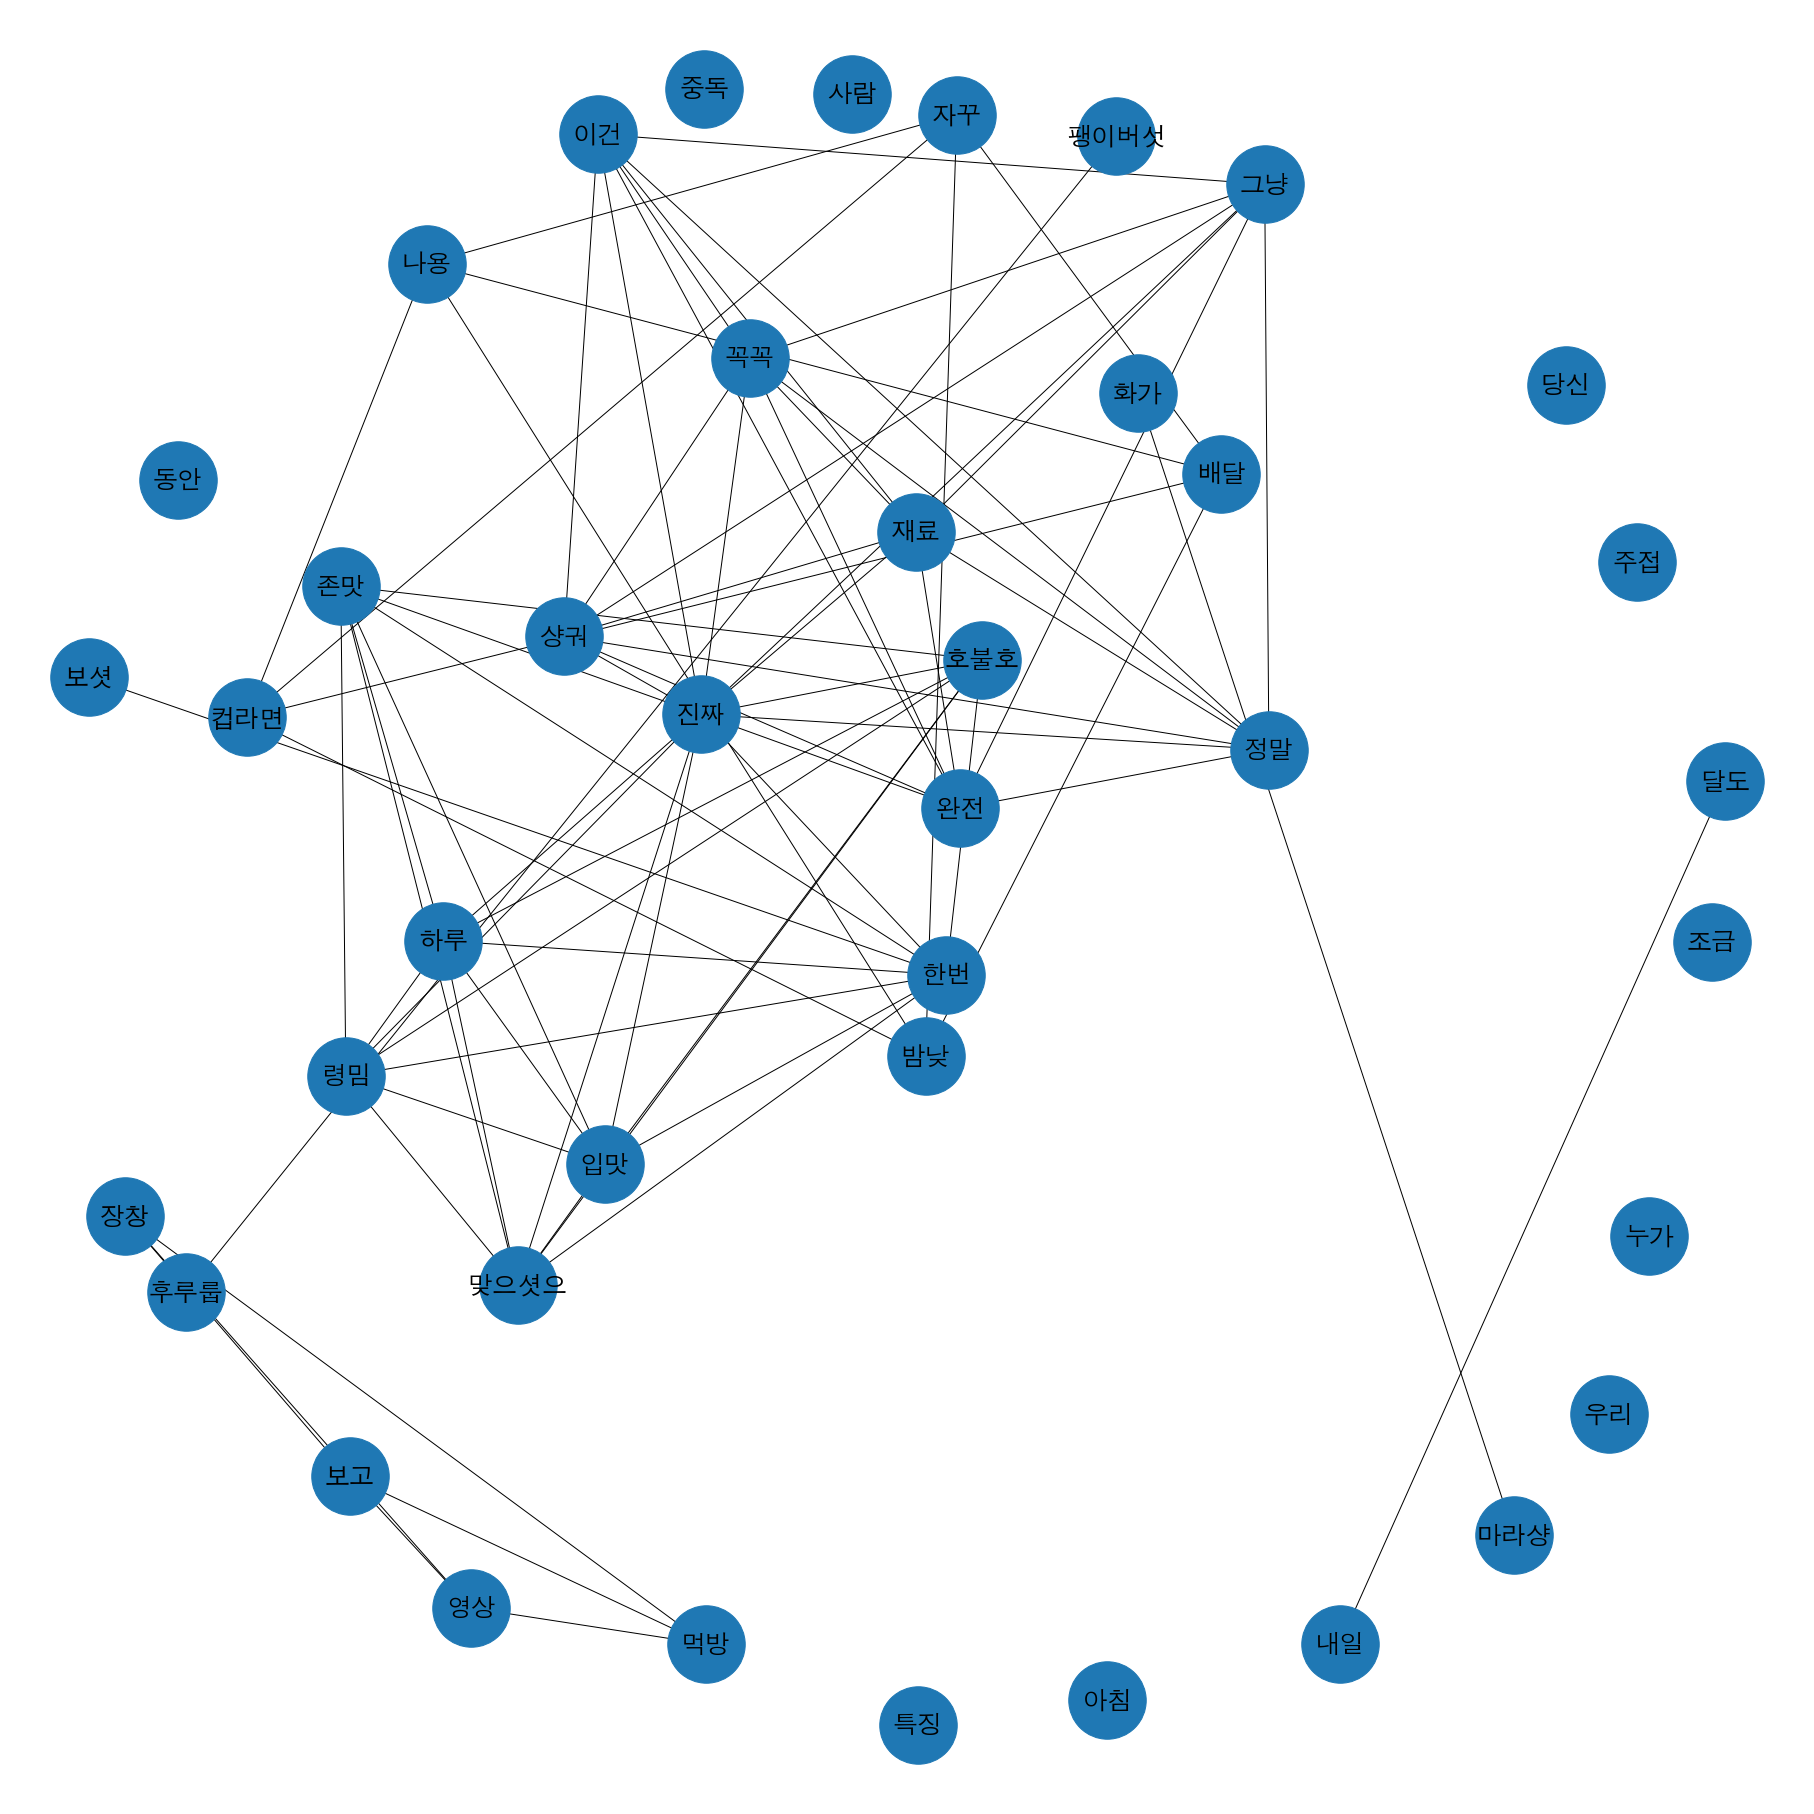

In [63]:
import networkx as nx
plt.figure(figsize=(25,25))

# 네트워크 객체 생성
G = nx.Graph()

# node_df 의 키워드 빈도수를 데이터로 하여 네트워크 그래프의 '노드' 역할을 하는 원을 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['node_size'])

# network_df 의 연관분석 데이터를 기반으로 네트워크 그래프의 '관계' 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터 설정
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = 6000
nx.draw(G, pos=pos, node_size=sizes)

# 폰트 입력
nx.draw_networkx_labels(G, pos=pos, font_family='AppleGothic', font_size=25)

# 그래프 출력
ax = plt.gca()
plt.show()